In [1]:
# Import libraries
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import urllib.request
import ssl

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [2]:
# Get updated IMDB data on the 250 greatest movies of all time with web scraping.
# Information is collected about:
# - Title
# - Publication date
# - Rating
# - Number of votes 

title_list = []
year_list = []
raiting_list = []
vote_list = []


def top_250_movie():
    count = 1
    url = 'https://www.imdb.com/chart/top/?ref_=nv_mv_250'
    answer = urllib.request.urlopen(url, context=ctx).read()
    soup = BeautifulSoup(answer, 'html.parser')
    
    # Title and year
    name_class = 'titleColumn'
    for link in soup.find_all('td', class_=name_class):
        movie = link.text.splitlines()
        movie[2] = movie[2].strip()
        title_list.append(movie[2])
        year_list.append(movie[3])

    # Rating
    name_class = 'ratingColumn imdbRating'
    for link in soup.find_all('td', class_=name_class):
        raiting = link.find("strong")
        raiting_list.append(raiting.text)

    # Total vote
    name_class = 'ratingColumn imdbRating'
    for link in soup.find_all('td', class_=name_class):
        element = link.find('strong')['title']
        element = element.split()
        vote_list.append(element[3])

    # Print data
    # print("TOP 250 MOVIES")
    # for m, y, r, v in zip(title_list, year_list, raiting_list, vote_list):
        # print(str(count) + '.', m, y, '  * ' + r + ' - ' + v)
        # count += 1


top_250_movie()


In [3]:
# Convert Total Vote to Integer type data
try:
    vote_list = [x.replace(',', '') for x in vote_list]
    vote_list = [int(x) for x in vote_list]
except:
    print("Error or already done ")  
# print("Total votes", sum(vote_list))
# print("Average for a movie ", sum(vote_list)/250)

In [4]:
# Removing brackets from the 'Year'
try:
    year_list = [x.replace('(', '') for x in year_list]
    year_list = [x.replace(')', '') for x in year_list]
    year_list = [int(x) for x in year_list]
except:
    print("Error or already done ")


In [5]:
# Convert Raiting to Float type data
raiting_list = [float(x) for x in raiting_list]

In [6]:
# Save data to file
col1 = "Title"
col2 = "Year"
col3 = "Rating"
col4 = "Total Vote"
data = pd.DataFrame({col1:title_list, col2:year_list, col3:raiting_list, col4:vote_list})
data.to_excel('imdb_data.xlsx', sheet_name='Top250', index=False)


In [7]:
# Read data from file Excel
df = pd.read_excel('imdb_data.xlsx', index_col=0) 

In [8]:
# Head data
pd.set_option('float_format', '{:f}'.format)
df.head()

,Year,Rating,Total Vote
Title,,,
Skazani na Shawshank,1994,9.200000,2568594
Ojciec chrzestny,1972,9.200000,1768350
Mroczny Rycerz,2008,9.000000,2533335
Ojciec chrzestny II,1974,9.000000,1223402
Dwunastu gniewnych ludzi,1957,9.000000,758596


In [9]:
# df.groupby(by=["Year"]).sum()
# df[['Year','Total Vote']].groupby('Year').sum()

In [10]:
# Grouping data by decade
decade_number =  df[['Total Vote']].groupby(pd.cut(df["Year"], np.arange(1920, 2030+10, 10), right=False)).size().to_frame('Number')
dn = pd.DataFrame(decade_number)

In [11]:
# Grouping data by ratings
rating_number = df.groupby(['Rating']).size().to_frame('Number')
rn = pd.DataFrame(rating_number)

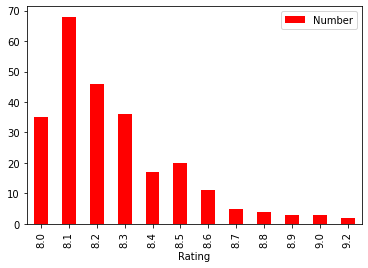

In [12]:
rating_bar = rn.plot.bar(color='red')

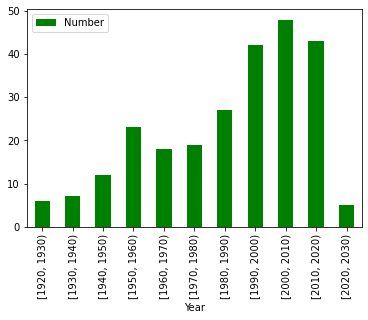

In [13]:
decade_bar = dn.plot.bar(color='green')

In [14]:
# Basic information about the data
df.describe()

,Year,Rating,Total Vote
count,250.000000,250.000000,250.000000
mean,1986.328000,8.260000,614724.240000
std,25.114285,0.235929,493393.133079
min,1921.000000,8.000000,27815.000000
25%,1966.250000,8.100000,220390.750000
50%,1994.000000,8.200000,478121.000000
75%,2006.000000,8.400000,924454.250000
max,2022.000000,9.200000,2568594.000000


In [15]:
# Dominant in Year and Rating
# df[['Year', 'Rating']].mode()
# df[['Year']].value_counts()
# df[['Rating']].value_counts()

In [16]:
# df[['Year']].idxmin()
# df[['Year']].idxmax()
# df[['Total Vote']].idxmin()
# df[['Total Vote']].idxmax()

There are 250 total observations (Top 250 movies)
\
(Data as of April 2, 2022)

Interpretation of the 'Year' variable:
- The oldest film is from 1921 (The Kid) and the youngest is from 2022 (The Batman)
- Most films come from 1995 (8 films). As for the decade, the most films were produced in the years 2000 - 2010 (48 films)
- Q1 = 1966. This means that 25% of films (approx. 63 films) were released before this year or 75% (approx. 188 films) of the films were released after 1996.
- Q2 = 1994. This means that 50% of the films (125 films) were released before this year or 50% of the films were released after 1994.
- Q3 = 2006. This means that 75% of the films were released before this year or 25% of the films were released after 2006.


Interpretation of the 'Rating' variable:
- The lowest movie rating is 8.0 and the highest is 9.2 (2 films: The Shawshank Redemption, The Godfather)
- Most films have a rating of 8.1 (68 films)
- Average rating for Top 250 movies is 8.26
- The standard deviation is 0.24. This means that the average rating of the film differs from the average (8.26) -> ~ 8.0 - 8.5
- Q1 = 8.1. This means that 25% of the films have a rating lower than 8.1 or 75% of the films have a higher rating
- Q2 = 8.2. This means that 50% of the films have a rating lower than 8.2 or 50% have a higher rating
- Q3 = 8.4. This means that 75% of the films have a rating lower than 8.4 or 25% have a higher rating


Interpretation of the 'Total Vote' variable:
- The total number of votes cast for the top 250 films is over 153 million
- On average, one film has over 600,000 votes.
- However, the standard deviation is very large, around 500,000.
- This means that there are a lot of movies that have very few votes and those that have a lot of votes -> ~ 120k - 1,1mln
- The film Dersu Uzała has the lowest number of votes (approx. 28 thousand).
- The film Shawshank Redemption has the most votes (approx. 2.56 million)
